# Boosting
Freud and Schapire in 1995 introduced the concept of boosting with the well-known
AdaBoost algorithm (adaptive boosting). The core concept of boosting is that rather
than an independent individual hypothesis, combining hypotheses in a sequential
order increases the accuracy. Essentially, boosting algorithms convert the weak
learners into strong learners. Boosting algorithms are well designed to address bias
problems

### Stand-Alone Decision Tree vs. AdaBoost

Let’s pick weak predictors from the Pima diabetic dataset and compare the
performance of a stand-alone decision tree model vs. AdaBoost with 100 boosting
rounds on the decision tree model

In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# read the data in
df = pd.read_csv("/content/drive/MyDrive/DS Specializations/ML/Machine Learning Specialization Script Files/Datasets/Diabetes.csv")
# Let's use some week features to build the tree
X = df[['age','serum_insulin']] # independent variables
y = df['class'].values # dependent variables
#Normalize
X = StandardScaler().fit_transform(X)

In [ ]:
df.head()

,preg_count,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df["class"].value_counts()

0    500
1    268
Name: class, dtype: int64

In [ ]:
df.corr()

,preg_count,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_function,age,class
preg_count,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_concentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


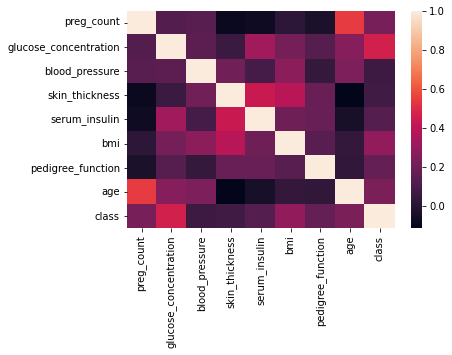

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())

In [ ]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2019)
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019, shuffle = True)
num_trees = 100

In [ ]:
kfold.split(X_train, y_train)

<generator object _BaseKFold.split at 0x7f8e2ae1ee50>

In [ ]:
# Dection Tree with 5 fold cross validation
# lets restrict max_depth to 1 to have more impure leaves

clf_DT = DecisionTreeClassifier(max_depth=1, random_state=2019).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_DT, X_train,y_train,cv=kfold.split(X_train, y_train))

print("Decision Tree (stand alone) - CV Train : %.2f" % results.mean())

print("Decision Tree (stand alone) - Train : %.2f" % metrics.accuracy_score(clf_DT.predict(X_train), y_train))
print("Decision Tree (stand alone) - Test : %.2f" % metrics.accuracy_score(clf_DT.predict(X_test), y_test))

Decision Tree (stand alone) - CV Train : 0.63
Decision Tree (stand alone) - Train : 0.64
Decision Tree (stand alone) - Test : 0.70


In [ ]:
X_train

array([[ 1.08564439,  0.90476228],
       [ 0.74529338, -0.69289057],
       [-0.70119842, -0.24137998],
       ...,
       [ 1.17073215,  0.29695956],
       [-0.70119842,  3.34465603],
       [ 0.74529338, -0.69289057]])

In [ ]:
clf_DT.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Using Adaptive Boosting of 100 iteration
clf_DT_Boost = AdaBoostClassifier(base_estimator=clf_DT, n_estimators=num_trees, learning_rate=0.1, random_state=2019).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_DT_Boost, X_train, y_train,cv=kfold.split(X_train, y_train))
print("\nDecision Tree (AdaBoosting) - CV Train : %.2f" % results.mean())
print("Decision Tree (AdaBoosting) - Train : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_train), y_train))
print("Decision Tree (AdaBoosting) - Test : %.2f" % metrics.accuracy_score(clf_DT_Boost.predict(X_test), y_test))



Decision Tree (AdaBoosting) - CV Train : 0.68
Decision Tree (AdaBoosting) - Train : 0.71
Decision Tree (AdaBoosting) - Test : 0.79


Notice that in this case, the AdaBoost algorithm has given an average rise of 9%
inaccuracy score between train/test dataset compared with the stand-alone decision
tree model

In [ ]:
clf_DT_Boost.predict(X_train)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Gradient Boosting

In [ ]:
#Gradient Boosting Classifier


from sklearn.ensemble import GradientBoostingClassifier

# Using Gradient Boosting of 100 iterations
clf_GBT = GradientBoostingClassifier(n_estimators=num_trees, learning_rate=0.1, random_state=2019).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_GBT, X_train, y_train, cv=kfold)

NameError: ignored

In [ ]:
print ("\nGradient Boosting - CV Train : %.2f" % results.mean())
print ("Gradient Boosting - Train : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_train), y_train))
print ("Gradient Boosting - Test : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_test), y_test))


Gradient Boosting - CV Train : 0.65
Gradient Boosting - Train : 0.79
Gradient Boosting - Test : 0.75


Let’s look at the digit classification to illustrate how the model performance improves
with each iteration.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
df= pd.read_csv('/content/drive/MyDrive/DS Specializations/ML/Machine Learning Specialization Script Files/Datasets/digit.csv')
X = df.iloc[:,1:17].values
y = df['lettr'].values

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2019)
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019, shuffle = True)
num_trees = 10

clf_GBT = GradientBoostingClassifier(n_estimators=num_trees, learning_rate=0.1, random_state=2019).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_GBT, X_train, y_train, cv=kfold)

In [ ]:
df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-edge,xegvy,y-edge,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
print ("\nGradient Boosting - Train : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_train), y_train))

print ("Gradient Boosting - Test : %.2f" % metrics.accuracy_score(clf_GBT.predict(X_test), y_test))


Gradient Boosting - Train : 0.75
Gradient Boosting - Test : 0.71


In [ ]:
# Let's predict for the letter 'T' and understand how the prediction
# accuracy changes in each boosting iteration
X_valid= (2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8)
print ("Predicted letter: ", clf_GBT.predict([X_valid]))


# Staged prediction will give the predicted probability for each boostingiteration
stage_preds = list(clf_GBT.staged_predict_proba([X_valid]))
final_preds = clf_GBT.predict_proba([X_valid])

Predicted letter:  ['T']


In [ ]:
stage_preds

[array([[0.03062265, 0.02886912, 0.028752  , 0.0302859 , 0.02925012,
         0.03026361, 0.02930255, 0.02859868, 0.02854069, 0.02978298,
         0.02906449, 0.02990313, 0.03008497, 0.0295406 , 0.02861959,
         0.03057271, 0.03140611, 0.02856735, 0.02949984, 0.25122353,
         0.03201301, 0.03640492, 0.02926726, 0.03082245, 0.03034266,
         0.02839907]]),
 array([[0.0256953 , 0.02398071, 0.0241386 , 0.02523106, 0.02446349,
         0.02566804, 0.024571  , 0.02372153, 0.03024236, 0.02525477,
         0.02424313, 0.02492703, 0.02507721, 0.02451118, 0.02407398,
         0.02577142, 0.02811071, 0.02367997, 0.02494551, 0.3588522 ,
         0.02678114, 0.03654036, 0.02442885, 0.02569285, 0.02570894,
         0.02368866]]),
 array([[0.02181753, 0.02002426, 0.02039243, 0.02107493, 0.02061205,
         0.02190366, 0.02086234, 0.01977607, 0.02517623, 0.02156719,
         0.02183168, 0.02118621, 0.02103701, 0.02044241, 0.02019426,
         0.02180432, 0.02361604, 0.0197751 , 0.02124158

In [ ]:
stage_preds[5][0]

array([0.01231746, 0.01092684, 0.01161685, 0.0116481 , 0.01156333,
       0.0125119 , 0.01294962, 0.01073985, 0.03453941, 0.01366502,
       0.01354985, 0.0123279 , 0.01178624, 0.01189148, 0.01137643,
       0.01227782, 0.01443513, 0.01106288, 0.01522476, 0.64180089,
       0.01272718, 0.02527773, 0.01120063, 0.01768404, 0.02364991,
       0.01124876])

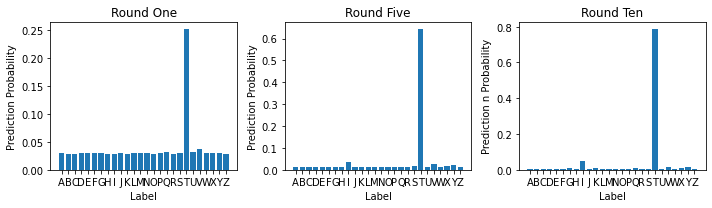

In [ ]:
# Plot
x = range(1,27)
label = np.unique(df['lettr'])
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.bar(x, stage_preds[0][0], align='center')
plt.xticks(x, label)
plt.xlabel('Label')
plt.ylabel('Prediction Probability')
plt.title('Round One')
plt.autoscale()

plt.subplot(1,3,2)
plt.bar(x, stage_preds[5][0],align='center')
plt.xticks(x, label)
plt.xlabel('Label')
plt.ylabel('Prediction Probability')
plt.title('Round Five')
plt.autoscale()

plt.subplot(1,3,3)
plt.bar(x, stage_preds[9][0],align='center')
plt.xticks(x, label)
plt.autoscale()
plt.xlabel('Label')
plt.ylabel('Prediction n Probability')
plt.title('Round Ten')
plt.tight_layout()
plt.show()

Gradient boosting corrects the erroneous boosting iteration’s negative impact in
subsequent iterations. Notice that in the first iteration the predicted probability for
letter “T” is 0.25 and it gradually increased to 0.76 by the tenth iteration, whereas the
probability percentage for other letters have decreased over each round

## Xgboost (eXtreme Gradient Boosting)

In [ ]:
#xgboost Classifier Using sklearn Wrapper
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# read the data in
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Specialization Script Files/Datasets/Diabetes.csv")
predictors = ['age','serum_insulin']
target = 'class'


# Most common preprocessing step include label encoding and missing value treatment
from sklearn import preprocessing

for f in df.columns:
  if df[f].dtype=='object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[f].values))
    df[f] = lbl.transform(list(df[f].values))

df.fillna((-999), inplace=True)

In [ ]:
df.dtypes == 'object'

preg_count               False
glucose_concentration    False
blood_pressure           False
skin_thickness           False
serum_insulin            False
bmi                      False
pedigree_function        False
age                      False
class                    False
dtype: bool

In [ ]:
df.isnull().sum()

preg_count               0
glucose_concentration    0
blood_pressure           0
skin_thickness           0
serum_insulin            0
bmi                      0
pedigree_function        0
age                      0
class                    0
dtype: int64

In [ ]:
X.describe()

,age,serum_insulin
count,768.000000,768.000000
mean,33.240885,79.799479
std,11.760232,115.244002
min,21.000000,0.000000
25%,24.000000,0.000000
50%,29.000000,30.500000
75%,41.000000,127.250000
max,81.000000,846.000000


In [ ]:
# Let's use some week features to build the tree
X = df[['age','serum_insulin']] # independent variables
y = df['class'].values # dependent variables

In [ ]:
#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2017)

num_rounds = 100

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2017, shuffle = True)

clf_XGB = XGBClassifier(n_estimators = num_rounds, objective= 'binary:logistic',seed=2017)

In [ ]:

# use early_stopping_rounds to stop the cv when there is no score imporovement

clf_XGB.fit(X_train,y_train, early_stopping_rounds=20, eval_set=[(X_test,y_test)], verbose=False)

results = model_selection.cross_val_score(clf_XGB, X_train,y_train,cv=kfold)

print ("\nxgBoost - CV Train : %.2f" % results.mean())
print ("xgBoost - Train : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_train), y_train))
print ("xgBoost - Test : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_test), y_test))


xgBoost - CV Train : 0.70
xgBoost - Train : 0.73
xgBoost - Test : 0.74


Now let’s also look at how to build a model using xgboost native interface. DMatrix
the internal data structure of xgboostfor input data. It is good practice to convert the
large dataset to DMatrix object to save preprocessing time

In [ ]:
#xgboost Using It’s Native Python Package Code

xgtrain = xgb.DMatrix(X_train, label=y_train, missing=-999)
xgtest = xgb.DMatrix(X_test, label=y_test, missing=-999)

# set xgboost params
param = {'max_depth': 3, # the maximum depth of each tree 
         'objective': 'binary:logistic'}


clf_xgb_cv = xgb.cv(param, xgtrain, num_rounds,stratified=True, nfold=5, early_stopping_rounds=20, seed=2017)

print ("Optimal number of trees/estimators is %i" % clf_xgb_cv.shape[0])
watchlist = [(xgtest,'test'), (xgtrain,'train')]

clf_xgb = xgb.train(param, xgtrain,clf_xgb_cv.shape[0], watchlist)

# predict function will produce the probability
# so we'll use 0.5 cutoff to convert probability to class label
y_train_pred = (clf_xgb.predict(xgtrain, ntree_limit=clf_xgb.best_iteration) > 0.5).astype(int)

y_test_pred = (clf_xgb.predict(xgtest, ntree_limit=clf_xgb.best_iteration)> 0.5).astype(int)

print ("XGB - Train : %.2f" % metrics.accuracy_score(y_train_pred, y_train))
print ("XGB - Test : %.2f" % metrics.accuracy_score(y_test_pred, y_test))

Optimal number of trees/estimators is 12
[0]	test-error:0.344156	train-error:0.299674
[1]	test-error:0.324675	train-error:0.273616
[2]	test-error:0.272727	train-error:0.281759
[3]	test-error:0.266234	train-error:0.278502
[4]	test-error:0.266234	train-error:0.273616
[5]	test-error:0.311688	train-error:0.254072
[6]	test-error:0.318182	train-error:0.254072
[7]	test-error:0.311688	train-error:0.252443
[8]	test-error:0.311688	train-error:0.252443
[9]	test-error:0.311688	train-error:0.250814
[10]	test-error:0.305195	train-error:0.245928
[11]	test-error:0.298701	train-error:0.2443
XGB - Train : 0.75
XGB - Test : 0.69


## Ensemble Voting—Machine Learning’s Biggest Heroes United

A voting classifier enables us to combine the predictions through majority voting
from multiple ML algorithms of different types, unlike Bagging/Boosting where a similar
type of multiple classifiers is used for majority voting

Let’s build individual models on the Pima diabetes dataset and try the voting
classifier, to combine model results to compare the change in accuracy

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Ensemble Model
import pandas as pd
import numpy as np
import six
import sys
sys.modules['sklearn.externals.six'] = six

#import mlrose
# set seed for reproducability
np.random.seed(2017)
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# currently its available as part of mlxtend and not sklearn
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:
# read the data in
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Specialization Script Files/Datasets/Diabetes.csv")

X = df.iloc[:,:8] # independent variables
y = df['class'] # dependent variables

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2017)

In [ ]:
LR = LogisticRegression(random_state=2017, max_iter = 1000)
RF = RandomForestClassifier(n_estimators = 100, random_state=2017)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)

clfs = []

print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, SVM, KNC, DTC, ABC, BC, GBC],
 ['Logistic Regression',
 'Random Forest',
 'Support Vector Machine',
 'KNeighbors',
 'Decision Tree',
 'Ada Boost',
 'Bagging',
 'Gradient Boosting']):

  scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5,scoring='accuracy')
  print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

  md = clf.fit(X, y)
  clfs.append(md)

  print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.76 (+/- 0.04) [Logistic Regression]
Test Accuracy: 0.80 
Train CV Accuracy: 0.74 (+/- 0.03) [Random Forest]
Test Accuracy: 1.00 
Train CV Accuracy: 0.74 (+/- 0.04) [Support Vector Machine]
Test Accuracy: 0.81 
Train CV Accuracy: 0.70 (+/- 0.05) [KNeighbors]
Test Accuracy: 0.84 
Train CV Accuracy: 0.69 (+/- 0.02) [Decision Tree]
Test Accuracy: 1.00 
Train CV Accuracy: 0.73 (+/- 0.04) [Ada Boost]
Test Accuracy: 0.83 
Train CV Accuracy: 0.74 (+/- 0.03) [Bagging]
Test Accuracy: 1.00 
Train CV Accuracy: 0.75 (+/- 0.03) [Gradient Boosting]
Test Accuracy: 0.92 


From the previous benchmarking we see that ‘Logistic Regression’, ‘Random Forest’,
‘Bagging’, and Ada/Gradient Boosting algorithms give better accuracy compared with
other models

From the previous benchmarking we see that ‘Logistic Regression’, ‘Random Forest’,
‘Bagging’, and Ada/Gradient Boosting algorithms give better accuracy compared with
other models.

In [ ]:
clfs

[LogisticRegression(max_iter=1000, random_state=2017),
 RandomForestClassifier(random_state=2017),
 SVC(probability=True, random_state=0),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 AdaBoostClassifier(n_estimators=100),
 BaggingClassifier(n_estimators=100),
 GradientBoostingClassifier()]

### Hard Voting vs. Soft Voting

Majority voting is also known as hard voting. The argmax of the sum of predicted
probabilities is known as soft voting. Parameter “weights” can be used to assign specific
weight to classifiers

In [ ]:
# Ensemble Voting Model
# ### Ensemble Voting

clfs = []
print('5-fold cross validation:\n')
ECH = EnsembleVoteClassifier(clfs=[LR, RF, GBC], voting='hard')
ECS = EnsembleVoteClassifier(clfs=[LR, RF, GBC], voting='soft', weights=[1,1,1])

for clf, label in zip([ECH, ECS],['Ensemble Hard Voting','Ensemble Soft Voting']):


  scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5,scoring='accuracy')
  print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(), label))
  
  md = clf.fit(X, y)
  clfs.append(md)
  print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.76 (+/- 0.02) [Ensemble Hard Voting]
Test Accuracy: 0.93 
Train CV Accuracy: 0.76 (+/- 0.03) [Ensemble Soft Voting]
Test Accuracy: 0.94 


## Stacking
In stacking, initially you train multiple base models of a different type on a training/
Model diagnoSiS and tuning
309
test dataset. It is ideal to mix models that work differently (kNN, bagging, boosting, etc.)
so they can learn some part of the problem

Let’s apply the stacking concept previously discussed on the diabetes dataset and
compare the accuracy of base vs. metamode

In [ ]:
# Model Stacking
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

seed = 2019

np.random.seed(seed) # seed to shuffle the train set

# read the data in
df = pd.read_csv("/content/drive/MyDrive/DS Specializations/ML/Machine Learning Specialization Script Files/Datasets/Diabetes.csv")

X = df.iloc[:,0:8] # independent variables
y = df['class'].values # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=seed, shuffle = True)

num_trees = 10
verbose = True # to print the progress

clfs = [KNeighborsClassifier(),
 RandomForestClassifier(n_estimators=num_trees, random_state=seed),
 GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)]

In [ ]:
X_train.shape[0]

614

In [ ]:
# Creating train and test sets for blending
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))

In [ ]:
dataset_blend_train[:,3]

IndexError: ignored

In [ ]:
print('5-fold cross validation:\n')


for i, clf in enumerate(clfs):
  print (i)
  scores = model_selection.cross_val_score(clf, X_train, y_train,cv=kfold, scoring='accuracy')

  print("##### Base Model %0.0f #####" % i)
  print("Train CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()))

  clf.fit(X_train, y_train)
  print("Train Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(X_train), y_train)))
  dataset_blend_train[:,i] = clf.predict_proba(X_train)[:,1]
  dataset_blend_test[:,i] = clf.predict_proba(X_test)[:,1]

  # in the above, the predicted probability values for the class 1 are then fed into the train,test blended dataset to
  # be used in the metamodel

  print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

0
##### Base Model 0 #####
Train CV Accuracy: 0.73 (+/- 0.01)
Train Accuracy: 0.83 
Test Accuracy: 0.75 
1
##### Base Model 1 #####
Train CV Accuracy: 0.74 (+/- 0.02)
Train Accuracy: 0.98 
Test Accuracy: 0.79 
2
##### Base Model 2 #####
Train CV Accuracy: 0.74 (+/- 0.01)
Train Accuracy: 0.80 
Test Accuracy: 0.80 


In [ ]:
5**5

3125

In [ ]:
clf.predict_proba(X_train)[:,1]

array([0.39431029, 0.36548404, 0.19660566, 0.29656503, 0.36548404,
       0.47789734, 0.39015974, 0.23378851, 0.33914348, 0.53949307,
       0.71258887, 0.28572336, 0.40692491, 0.61486919, 0.52217368,
       0.39015974, 0.27148012, 0.41288792, 0.48390425, 0.26140932,
       0.23378851, 0.36548404, 0.15538093, 0.36548404, 0.44272733,
       0.35907739, 0.39015974, 0.51569847, 0.58415408, 0.59885415,
       0.21197785, 0.21148172, 0.25434325, 0.21148172, 0.15538093,
       0.44284358, 0.53949307, 0.44468637, 0.27141781, 0.4264902 ,
       0.18448256, 0.15538093, 0.69090368, 0.69638546, 0.48390425,
       0.15538093, 0.61486919, 0.19660566, 0.47893074, 0.35171195,
       0.47869069, 0.41964505, 0.24410851, 0.19660566, 0.21148172,
       0.19056865, 0.51569847, 0.33656132, 0.2788034 , 0.15538093,
       0.25311972, 0.62668727, 0.36548404, 0.54489673, 0.31962936,
       0.21148172, 0.42225589, 0.18448256, 0.47161981, 0.54489673,
       0.15538093, 0.17696581, 0.19660566, 0.64518723, 0.24410

In [ ]:
dataset_blend_train

array([[0.6       , 0.8       , 0.39431029],
       [0.2       , 0.2       , 0.36548404],
       [0.        , 0.        , 0.19660566],
       ...,
       [0.8       , 1.        , 0.69163688],
       [0.6       , 1.        , 0.68890335],
       [0.6       , 0.9       , 0.44548795]])

In [ ]:
clf.predict_proba(X_train)

array([[0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8]])

In [ ]:
dataset_blend_train

array([[0.6       , 0.8       , 0.39431029],
       [0.2       , 0.2       , 0.36548404],
       [0.        , 0.        , 0.19660566],
       ...,
       [0.8       , 1.        , 0.69163688],
       [0.6       , 1.        , 0.68890335],
       [0.6       , 0.9       , 0.44548795]])

In [ ]:
print ("##### Meta Model #####")

clf = LogisticRegression()
scores = model_selection.cross_val_score(clf, dataset_blend_train, y_train,cv=kfold, scoring='accuracy')

clf.fit(dataset_blend_train, y_train)
print("Train CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

print("Train Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(dataset_blend_train), y_train)))

print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(dataset_blend_test), y_test)))

##### Meta Model #####
Train CV Accuracy: 0.98 (+/- 0.01)
Train Accuracy: 0.99 
Test Accuracy: 0.79 


### Hyperparameter Tuning
One of the primary objectives and challenges in the ML process is improving the
performance score, based on data patterns and observed evidence. To achieve this
objective, almost all ML algorithms have a specific set of parameters that need to
estimate from a dataset, which will maximize the performance score

Scikit-learn provides GridSearchCV and
RandomSearchCV functions to facilitate an automatic and reproducible approach for
hyperparameter tuning

Let’s try GridSearchCV for a RandomForest classifier on the Pima diabetes data set,
to find the optimal parameter values

## Grid Search

In [ ]:
# Grid Search for Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

seed = 2017

# read the data in
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Specialization Script Files/Datasets/Diabetes.csv")

X = df.iloc[:,:8].values # independent variables
y = df['class'].values # dependent variables
#Normalize
X = StandardScaler().fit_transform(X)

In [ ]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=seed, shuffle = True)
num_trees = 100
clf_rf = RandomForestClassifier(random_state=seed).fit(X_train, y_train)

In [ ]:
rf_params = {
'n_estimators': [100, 250, 500, 750, 1000],
'criterion': ['gini', 'entropy'],
'max_features': [None, 'auto', 'sqrt', 'log2'],
'max_depth': [1, 3, 5, 7, 9]
}

In [ ]:
# setting verbose = 10 will print the progress for every 10 task completion
grid = GridSearchCV(clf_rf, rf_params, scoring='roc_auc', cv=kfold, verbose=10, n_jobs=-1)

grid.fit(X_train, y_train)
print ('Best Parameters: ', grid.best_params_)

results = model_selection.cross_val_score(grid.best_estimator_, X_train,y_train, cv=kfold)

print ("Accuracy - Train CV: ", results.mean())
print ("Accuracy - Train : ", metrics.accuracy_score(grid.best_estimator_.predict(X_train), y_train))

print ("Accuracy - Test : ", metrics.accuracy_score(grid.best_estimator_.predict(X_test), y_test))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
Accuracy - Train CV:  0.7522499134648667
Accuracy - Train :  0.8621973929236499
Accuracy - Test :  0.7965367965367965


## RandomSearch
As the name suggests, the RandomSearch algorithm tries random combinations of a
range of values of given parameters. The numerical parameters can be specified as a
range (unlike fixed values in GridSearch).

Let’s try the RandomSearchCV for the same combination that we tried for
GridSearch and compare the time/accuracy

In [ ]:
# Random Search for Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# specify parameters and distributions to sample from
param_dist = {'n_estimators':sp_randint(100,1000),
 'criterion': ['gini', 'entropy'],
 'max_features': [None, 'auto', 'sqrt', 'log2'],
 'max_depth': [None, 1, 3, 5, 7, 9]
 }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist, cv=kfold, n_iter=n_iter_search,
verbose=10, n_jobs=-1, random_state=seed)

In [ ]:
import time

start = time.time()

random_search.fit(X_train, y_train)

end = time.time()
print(end - start)


# report(random_search.cv_results_)
print ('Best Parameters: ', random_search.best_params_)
results = model_selection.cross_val_score(random_search.best_estimator_, X_train,y_train, cv=kfold)

print ("Accuracy - Train CV: ", results.mean())
print ("Accuracy - Train : ", metrics.accuracy_score(random_search.best_estimator_.predict(X_train), y_train))

print ("Accuracy - Test : ", metrics.accuracy_score(random_search.best_estimator_.predict(X_test), y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
121.14611482620239
Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 293}
Accuracy - Train CV:  0.7540498442367601
Accuracy - Train :  0.845437616387337
Accuracy - Test :  0.7835497835497836


In [ ]:
sp_randint(100,1000).rvs(5)

array([390, 680, 742, 367, 276])

In [ ]:
list()

[]

In [ ]:
np.linspace(1,10,5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [ ]:
np.random.randint(1, 10, 5)

array([2, 6, 6, 4, 6])

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=ae2960dd25b9c4c795548dc2fba6afe9f0e4e72719e255caac035e7a20923afb
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
#Random Search for Hyperparameter Tuning
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from bayes_opt.util import Colours
from sklearn.ensemble import RandomForestClassifier as RFC

def rfc_cv(n_estimators, min_samples_split, max_features, data, targets):
# """Random Forest cross validation.
# This function will instantiate a random forest classifier with
# parameters
# n_estimators, min_samples_split, and max_features. Combined with
# data and
# targets this will in turn be used to perform cross-validation.
# The result of cross validation is returned. Our goal is to find
# combinations of n_estimators, min_samples_split, and
# max_features that minimzes the log loss.
# """
  estimator = RFC(
  n_estimators=n_estimators,
  min_samples_split=min_samples_split,
  max_features=max_features,
  random_state=2
  )
  cval = cross_val_score(estimator, data, targets, scoring='neg_log_loss', cv=4)
  
  return cval.mean()



def optimize_rfc(data, targets):
#Apply Bayesian Optimization to Random Forest parameters.
  def rfc_crossval(n_estimators, min_samples_split, max_features):
# """Wrapper of RandomForest cross validation.
#  Notice how we ensure n_estimators and min_samples_split are casted
#  to integer before we pass them along. Moreover, to avoid max_
# features
#  taking values outside the (0, 1) range, we also ensure it is capped
#  accordingly.
#  """
    return rfc_cv(
    n_estimators=int(n_estimators),
    min_samples_split=int(min_samples_split),
    max_features=max(min(max_features, 0.999), 1e-3),
    data=data,
    targets=targets,
    )
  optimizer = BayesianOptimization(f=rfc_crossval, pbounds={
  "n_estimators": (10, 250),
  "min_samples_split": (2, 25),
  "max_features": (0.1, 0.999),
  },
  random_state=1234,
  verbose=5
  )

  optimizer.maximize(n_iter=10)


  print("Final result:", optimizer.max)
  return optimizer


print(Colours.green("--- Optimizing Random Forest ---"))

optimize_rfc(X_train, y_train)


--- Optimizing Random Forest ---
|   iter    |  target   | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        | -0.5113   |  0.2722   |  16.31    |  115.1    |
|  2        | -0.5227   |  0.806    |  19.94    |  75.42    |
|  3        | -0.5082   |  0.3485   |  20.44    |  240.0    |
|  4        | -0.5324   |  0.8875   |  10.23    |  130.2    |
|  5        | -0.5134   |  0.7144   |  18.39    |  98.86    |
|  6        | -0.5188   |  0.8021   |  18.14    |  230.7    |
|  7        | -0.5226   |  0.9241   |  16.19    |  80.11    |
|  8        | -0.5194   |  0.1      |  21.2     |  247.0    |
|  9        | -0.5117   |  0.6331   |  23.99    |  238.0    |
|  10       | -0.5157   |  0.687    |  14.25    |  239.8    |
|  11       | -0.5046   |  0.468    |  17.3     |  107.9    |
|  12       | -0.5137   |  0.641    |  23.61    |  108.7    |
|  13       | -0.5117   |  0.2639   |  11.58    |  107.8    |
|  14       | -0.5151   |  0.6796   |

In [ ]:
# Wavelet Transform Implementation
import pywt
from statsmodels.robust import mad
import pandas as pd
import numpy as np



df = pd.read_csv('Data/Temperature.csv')



# Function to denoise the sensor data using wavelet transform
def wp_denoise(df):
  for column in df:
    x = df[column]
    wp = pywt.WaveletPacket(data=x, wavelet='db7', mode='symmetric')
    new_wp = pywt.WaveletPacket(data=None, wavelet='db7', mode='sym')
  for i in range(wp.maxlevel):
    nodes = [node.path for node in wp.get_level(i, 'natural')]

 
 # Remove the high and low pass signals
  for node in nodes:
    sigma = mad(wp[node].data)
    uthresh = sigma * np.sqrt( 2*np.log( len( wp[node].data ) ) )
    new_wp[node] = pywt.threshold(wp[node].data, value=uthresh,
    mode='soft')


  y = new_wp.reconstruct(update=False)[:len(x)]
  df[column] = y
  return df


# denoise the sensor data
df_denoised = wp_denoise(df.iloc[:,3:4])

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(1)
ax1 = plt.subplot(221)

df['4030CFDC'].plot(ax=ax1, figsize=(8, 8), title='Signal with noise')
ax2 = plt.subplot(222)
df_denoised['4030CFDC'].plot(ax=ax2, figsize=(8, 8), title='Signal without noise')